!pip install xgboost

In [27]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings


# matplotlib 한글 폰트 오류 문제 해결
# font_manager는 경로와 이름을 가지고 폰트를 지정
# rc는 폰트를 적용
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [28]:
df = pd.read_csv("./20202021data.csv", encoding = "euc-kr")

df = df[['상장유지년도_2020(X1)', '2020 배당성향(X3)', '2020 배당률(X4)',
       '당기순손실여부_2020(X5)', '주당순이익감소여부_2020(X6)', '유동비율_전기(X7)', '부채비율_전기(X8)',
       '총자산증가율_전기(X10)', '매출액증가율_전기(X11)', '매출액순이익률_전기(X12)',
       '총자본영업이익률_전기(X13)', '자기자본순이익률_전기(X14)', '2020_외국인지분율(X17)',
       '외국인지분율변동_2020(X18)', '배당정책_2020(Y)']]

# 열 이름 변경
df.columns = [  '상장유지년도(X1)', '배당성향(X2)', '배당률(X3)',
       '당기순손실여부(X4)', '주당순이익감소여부(X5)', '유동비율(X6)', '부채비율(X7)',
       '총자산증가율(X8)', '매출액증가율(X9)', '매출액순이익률(X10)',
       '총자본영업이익률(X11)', '자기자본순이익률(X12)', '외국인지분율(X13)',
       '외국인지분율변동(X14)', '배당정책_(Y)']

In [29]:
from sklearn.preprocessing import StandardScaler

InputFeature = df.iloc[:,:-1].values
Label = df.iloc[:, -1]

InputFeature = StandardScaler().fit_transform(InputFeature)

features = [ '상장유지년도(X1)', '배당성향(X2)', '배당률(X3)',
       '당기순손실여부(X4)', '주당순이익감소여부(X5)', '유동비율(X6)', '부채비율(X7)',
       '총자산증가율(X8)', '매출액증가율(X9)', '매출액순이익률(X10)',
       '총자본영업이익률(X11)', '자기자본순이익률(X12)', '외국인지분율(X13)',
       '외국인지분율변동(X14)']
df_st = pd.DataFrame(InputFeature, columns=features)
df_st.head()

,상장유지년도(X1),배당성향(X2),배당률(X3),당기순손실여부(X4),주당순이익감소여부(X5),유동비율(X6),부채비율(X7),총자산증가율(X8),매출액증가율(X9),매출액순이익률(X10),총자본영업이익률(X11),자기자본순이익률(X12),외국인지분율(X13),외국인지분율변동(X14)
0,-1.171724,1.888182,-0.181354,-0.329415,1.223209,-0.285763,4.480999,-0.645084,0.088754,-0.365530,-0.231848,-0.191291,0.233730,-1.118413
1,0.081638,-0.307974,-0.224765,-0.329415,1.223209,-0.302159,-0.550302,0.057682,0.489657,0.419517,-0.143512,-0.609845,0.016800,0.894124
2,-1.328394,-0.259579,-0.171336,-0.329415,-0.817522,-0.210338,2.021297,-1.196416,0.327123,-0.349727,1.164206,1.071846,0.229134,0.894124
3,-1.093389,0.116498,-0.214747,-0.329415,-0.817522,2.476984,-1.062963,-0.470094,0.713901,1.458809,-0.588656,-0.641878,-0.002503,0.894124
4,-1.328394,-0.070631,0.549950,-0.329415,1.223209,-0.251724,3.380465,-0.005135,-0.171778,-0.445940,0.272187,1.197839,2.078548,0.894124


In [30]:
# train test set 8 : 2 로 분리
train_x = df_st.iloc[:int(len(df_st) * 0.8), :]
train_y = Label[ : int(len(Label) * 0.8)]

test_x = df_st.iloc[int(len(df_st) * 0.8) :, :]
test_y = Label[int(len(Label) * 0.8) : ]

In [31]:
# xgboost 모델에 학습 시키고 예측
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate = 0.01, max_depth=3)
xgb_wrapper.fit(train_x, train_y) 
w_preds = xgb_wrapper.predict(test_x)
w_pred_proba = xgb_wrapper.predict_proba(test_x)[:,1]


In [32]:
# confusion matrix구하기
get_clf_eval(test_y, w_preds, w_pred_proba)


오차 행렬
[[43 16]
 [27 47]]
정확도 : 0.6767, 정밀도 : 0.6143, 재현율 : 0.7288, F1 : 0.6667, AUC:0.681974


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

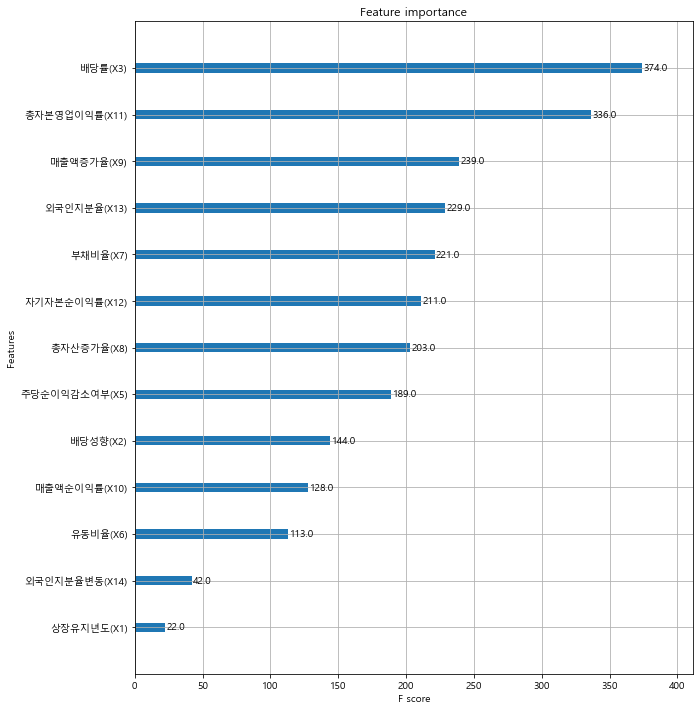

In [33]:
# Feature importance 구하기
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper, ax=ax)


In [34]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(test_y, w_preds))

0.6819743472285844
